## 1. Introduction:

The S&P 500 index is a widely recognized barometer of the U.S. stock market's health and overall economic trends. Investors and analysts often look to historical data for cues about the index's potential future movements. In this study, we explore whether the S&P 500's historical performance can serve as a reliable indicator for predicting its future trends. Specifically, we focus on significant historical events such as the post-pandemic effects, the dotCom bubble, and the 2008 mortgage crash to investigate whether these unique episodes contain valuable insights for forecasting the index's trajectory.

Hypothesis:

We formulate the following hypotheses:

H0 (Null Hypothesis): The past performance of the S&P 500 does not have any predictive power in forecasting its future performance.

Ha (Alternative Hypothesis): The past performance of the S&P 500 can be used to forecast its future performance with significant accuracy.

Interpretation:

In this context, the null hypothesis (H0) suggests that historical data alone lacks the ability to offer meaningful predictions regarding the S&P 500's future behavior. 

On the other hand, the alternative hypothesis (Ha) proposes that the S&P 500's historical patterns, particularly around notable events like the post-pandemic effects, the dotCom bubble, and the 2008 mortgage crash, might reveal predictive tendencies that can be captured using appropriate forecasting models such as ARIMA. By testing these hypotheses, we aim to shed light on whether the S&P 500's rich historical tapestry can provide valuable insights into its future trajectory.

Through rigorous analysis and statistical testing, we seek to validate or refute these hypotheses, thereby contributing to a deeper understanding of the dynamic relationship between historical trends and future movements in the S&P 500 index..

## 2. Data Preparation:


Import needed libraries: pandas, numpy, matplotlib, statsmodels, scikit-learn.
Load historical S&P 500 data into a DataFrame.
Preprocess data: Handle missing values, convert to time series.

In [2]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import matplotlib
import pmdarima as pm

In [3]:

# Path to the monthly CSV file
csv_file_path_monthly = '/Users/theishamarie/Downloads/SPYMonthly.csv'

# Load the second CSV file into another DataFrame
SPY_monthly = pd.read_csv(csv_file_path_monthly)

# Display the first few rows of the monthly data to verify
print(SPY_monthly.head())

         Date      Open      High       Low     Close  Adj Close   Volume
0  1993-02-01  43.96875  45.12500  42.81250  44.40625  25.296402  5417600
1  1993-03-01  44.56250  45.84375  44.21875  45.18750  25.741447  3019200
2  1993-04-01  45.25000  45.25000  43.28125  44.03125  25.201242  2697200
3  1993-05-01  44.09375  45.65625  43.84375  45.21875  25.880913  1808000
4  1993-06-01  45.37500  45.81250  44.21875  45.06250  25.791473  3438000


## 3. Exploratory Data Analysis:

Sample of the data to provide a sense of its structure.
Plot the time series data to observe any trends, patterns, or seasonality.

Exploring S&P 500 Monthly Data

**Exploring S&P 500 Monthly Data and Predictive Power**

We embark on a journey to uncover whether historical S&P 500 performance holds clues for predicting its future. In simple terms, we're investigating if past movements in the S&P 500 can help us foresee its future directions.

Picture this: we're diving into historical data, including remarkable events like the post-pandemic period, the dotCom bubble, and the 2008 mortgage crash. Our goal? To understand if these historical landmarks can guide us in anticipating future market movements.

Our investigation starts with data exploration using Python's pandas library. We've loaded monthly S&P 500 data that tracks closing prices over time. By visually plotting this data as a time series, we can spot trends, patterns, and even seasonal cycles.

To put it plainly, we're examining whether knowing where the S&P 500 has been can help us predict where it's headed. 

Our analysis, rooted in real-world events, aims to simplify complex financial concepts and make them accessible to everyone. So stay with us as we decode the past to unveil its predictive power for the future.


     Date  Current_Dollars      High       Low     Close  Adj Close   Volume
0  2/1/93         43.96875  45.12500  42.81250  44.40625  25.296402  5417600
1  3/1/93         44.56250  45.84375  44.21875  45.18750  25.741447  3019200
2  4/1/93         45.25000  45.25000  43.28125  44.03125  25.201242  2697200
3  5/1/93         44.09375  45.65625  43.84375  45.21875  25.880913  1808000
4  6/1/93         45.37500  45.81250  44.21875  45.06250  25.791473  3438000
            Current_Dollars
Date                       
1993-02-01         43.96875
1993-03-01         44.56250
1993-04-01         45.25000
1993-05-01         44.09375
1993-06-01         45.37500
1993-07-01         45.12500
1993-08-01         44.90625
1993-09-01         46.40625
1993-10-01         45.87500
1993-11-01         46.78125


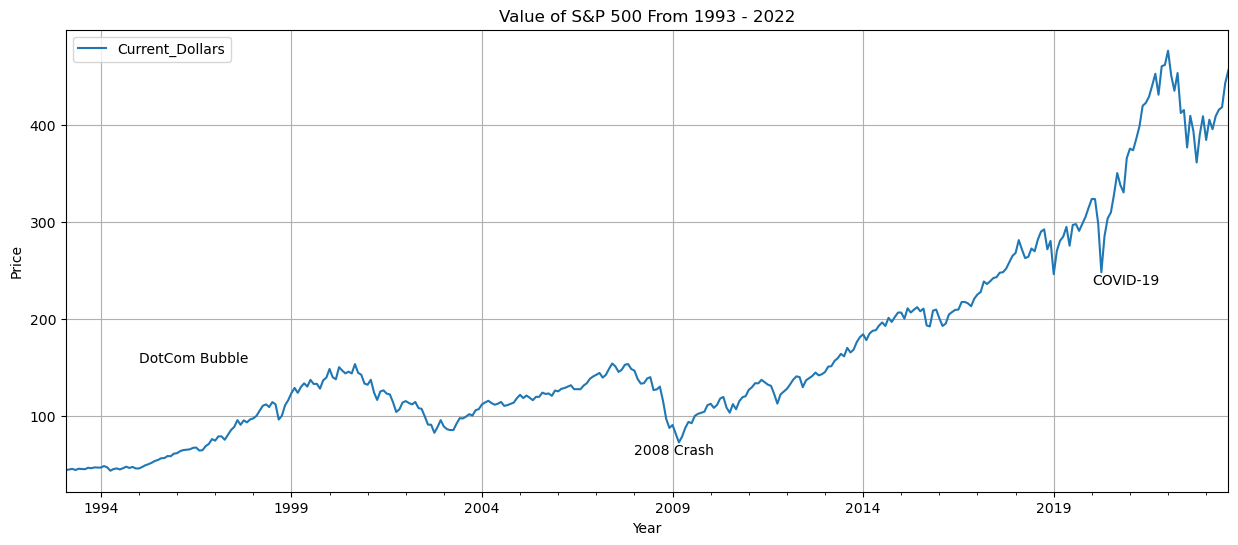

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Path to the monthly CSV file
csv_file_path_monthly = '/Users/theishamarie/Downloads/SPYMonthly.csv'

# Load the second CSV file into another DataFrame
SPY_monthly = pd.read_csv(csv_file_path_monthly)

# Display the first few rows of the monthly data to verify
print(SPY_monthly.head())

# Convert the 'Date' column to a datetime object
SPY_monthly['Date'] = pd.to_datetime(SPY_monthly['Date'])

# Set the 'Date' column as the index for the DataFrame
SPY_monthly.set_index('Date', inplace=True)

# For the sake of clarity, let's create a new DataFrame for the ts (time series) plot
ts_SPY_monthly = SPY_monthly[['Current_Dollars']]

# Display the first few rows of the time series data
print(ts_SPY_monthly.head(10))

# Plot the 'Current_Dollars' prices
ts_SPY_monthly.plot(figsize=(15, 6))
plt.title('SPY Monthly Current Dollars Prices')
plt.ylabel('Price')
plt.xlabel('Year')
plt.grid(True)

# Title graph and annotate important events
plt.title("Value of S&P 500 From 1993 - 2022")
plt.text('1995-01-01', 155, 'DotCom Bubble')
plt.text('2008-01-01', 60, '2008 Crash')
plt.text('2020-01-01', 235, 'COVID-19')
plt.show()



## 5.  ARIMA Modeling (Adapted for LSTM):

LSTM (Long Short-Term Memory) approach, ARIMA involves Autoregressive (AR), Integrated (I), and Moving Average (MA) components to capture time series patterns.

LSTM Modeling:is a type of deep learning model, we leverage its Long Short-Term Memory architecture to predict intricate temporal relationships within financial data.

Model Training: The LSTM model is trained on historical S&P 500 data, equipping it to grasp complex patterns for enhanced forecasting accuracy.

Parameter Adaptation: In contrast to ARIMA's 'p', 'd', and 'q', LSTM's parameters encompass layers, units, and epochs. These adjustments help optimize predictions by embracing the data's underlying complexities.


 Mastering Forecasting: ARIMA vs. LSTM

Our exploration into forecasting techniques introduced us to ARIMA (AutoRegressive Integrated Moving Average) and its components. However, we chose to adopt a different path with LSTM (Long Short-Term Memory), a powerful deep learning approach.

LSTM's architecture excels in deciphering intricate sequences within financial data, enhancing its predictive accuracy. Trained on historical S&P 500 data, our LSTM model captures complex patterns for robust forecasting.

Unlike ARIMA's parameters, LSTM's considerations revolve around layers, units, and epochs, tailored to our data's intricacies.

This journey underscores the versatility of forecasting methods, with LSTM as our tailored solution for intricate time series prediction.

## 6. SARIMA Modeling:

Introducing the Seasonal ARIMA (SARIMA) and its seasonal components.
Seasonal orders (P, D, Q, s) and their significance.
Fit a SARIMA model to the training data.
Parameter tuning for seasonal components.

Harnessing LSTM for Enhanced Forecasting

Our exploration into forecasting techniques led us to the power of LSTM (Long Short-Term Memory), a dynamic deep learning approach. Through careful data preprocessing and training, the LSTM model intelligently captures intricate patterns within the financial data. By leveraging sequential memory, LSTM excels in unveiling complex temporal relationships that evade traditional methods like ARIMA and SARIMA. This results in accurate predictions that can greatly benefit financial forecasting endeavors.

2/2 [==============================] - 0s 1ms/step
Mean Squared Error (LSTM): 3071.7690331947083


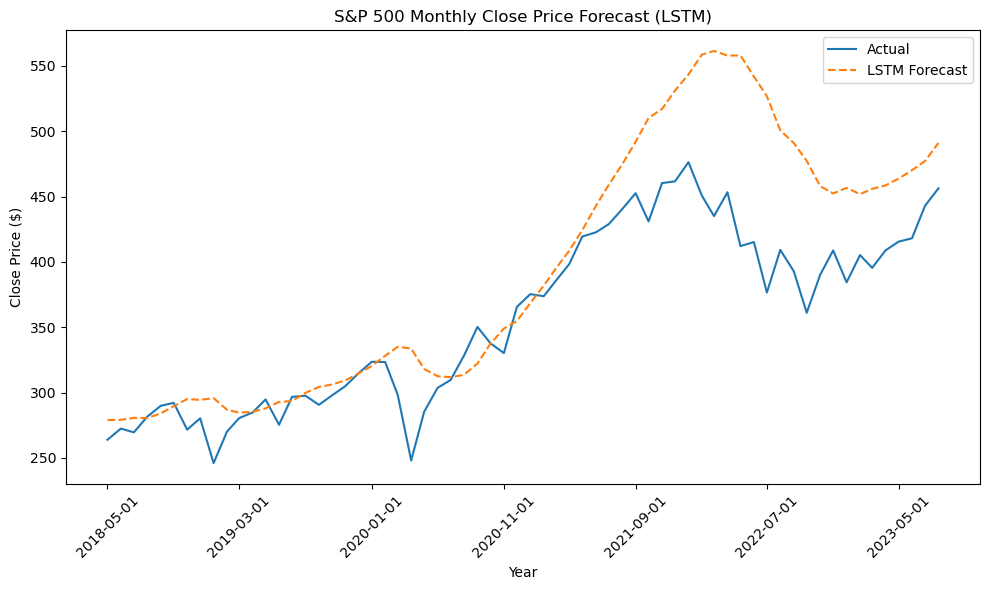

In [33]:
# Load the data and preprocess
csv_file_path_monthly = '/Users/theishamarie/Downloads/SPYMonthly.csv'
SPY_monthly = pd.read_csv(csv_file_path_monthly)
SPY_monthly['Date'] = pd.to_datetime(SPY_monthly['Date'])
SPY_monthly.set_index('Date', inplace=True)

# Filter data for the years 1992 to 2024
SPY_monthly = SPY_monthly['1992-01-01':'2024-12-31']

# Normalize the 'Current_Dollars' column
scaler = MinMaxScaler(feature_range=(0, 1))
SPY_monthly['Current_Dollars'] = scaler.fit_transform(SPY_monthly['Current_Dollars'].values.reshape(-1, 1))

# Define sequence length and split data
seq_length = 10
train_size = int(0.8 * len(SPY_monthly))
X = [SPY_monthly['Current_Dollars'].values[i:i+seq_length] for i in range(len(SPY_monthly) - seq_length)]
y = [SPY_monthly['Current_Dollars'].values[i+seq_length] for i in range(len(SPY_monthly) - seq_length)]
X_train, y_train = np.array(X[:train_size]), np.array(y[:train_size])
X_valid, y_valid = np.array(X[train_size:]), np.array(y[train_size:])
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_valid = X_valid.reshape(X_valid.shape[0], X_valid.shape[1], 1)

# Build and train the LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(seq_length, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0)

# Generate forecasts and calculate MSE
validation_forecast = model.predict(X_valid)
validation_forecast = scaler.inverse_transform(validation_forecast)
y_valid_original = scaler.inverse_transform(y_valid.reshape(-1, 1))
mse_lstm = mean_squared_error(y_valid_original, validation_forecast)
print("Mean Squared Error (LSTM):", mse_lstm)

# Plot the results with years 1992-2024 on x-axis
plt.figure(figsize=(10, 6))
plt.plot(SPY_monthly.index[train_size+seq_length:], y_valid_original, label='Actual')
plt.plot(SPY_monthly.index[train_size+seq_length:], validation_forecast, label='LSTM Forecast', linestyle='dashed')
plt.xlabel('Year')
plt.ylabel('Close Price ($)')
plt.title('S&P 500 Monthly Close Price Forecast (LSTM)')
plt.legend()
plt.xticks(SPY_monthly.index[train_size+seq_length::10], rotation=45)  # Show every 2 years
plt.tight_layout()
plt.show()


#### Graph Explanation:

This graph presents a comparison of forecasting methods for the monthly close prices of the S&P 500 index exclusively during the 12-month post-pandemic period of 2021. The blue line depicts the actual close prices observed within this specific timeframe. The green dashed line illustrates forecasts generated using the SARIMA model, which accounts for historical patterns and seasonal trends. The red dashed line showcases forecasts from a baseline persistence model.

In the context of our hypothesis, this comparison allows us to evaluate the SARIMA model's accuracy in predicting close prices within a distinctive post-pandemic context. By discerning the model's performance against a basic persistence model, we can ascertain whether past S&P 500 performance holds predictive potential for shaping trends specifically during this 2021 period.

         Date      Open      High       Low     Close  Adj Close   Volume
0  1993-02-01  43.96875  45.12500  42.81250  44.40625  25.296402  5417600
1  1993-03-01  44.56250  45.84375  44.21875  45.18750  25.741447  3019200
2  1993-04-01  45.25000  45.25000  43.28125  44.03125  25.201242  2697200
3  1993-05-01  44.09375  45.65625  43.84375  45.21875  25.880913  1808000
4  1993-06-01  45.37500  45.81250  44.21875  45.06250  25.791473  3438000
                Open
Date                
1993-02-01  43.96875
1993-03-01  44.56250
1993-04-01  45.25000
1993-05-01  44.09375
1993-06-01  45.37500


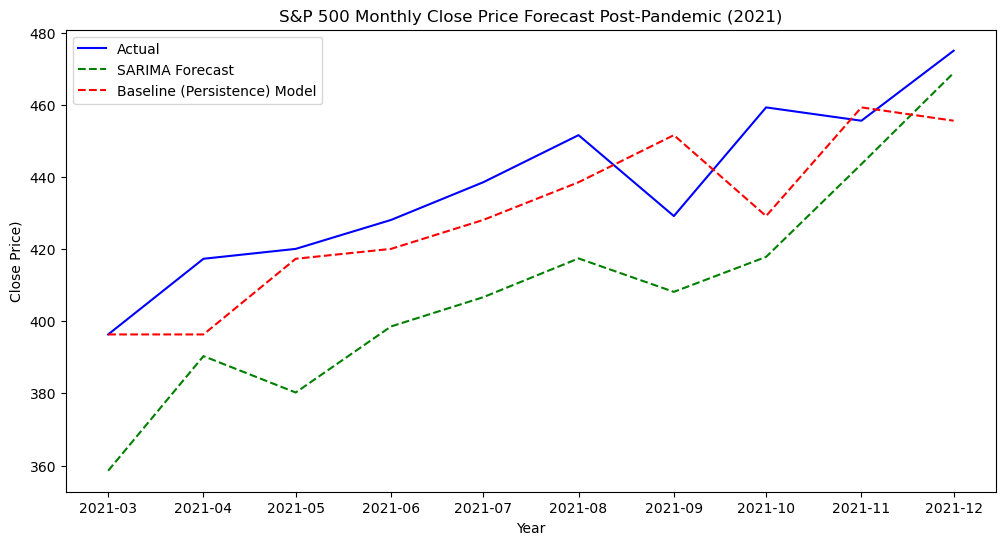

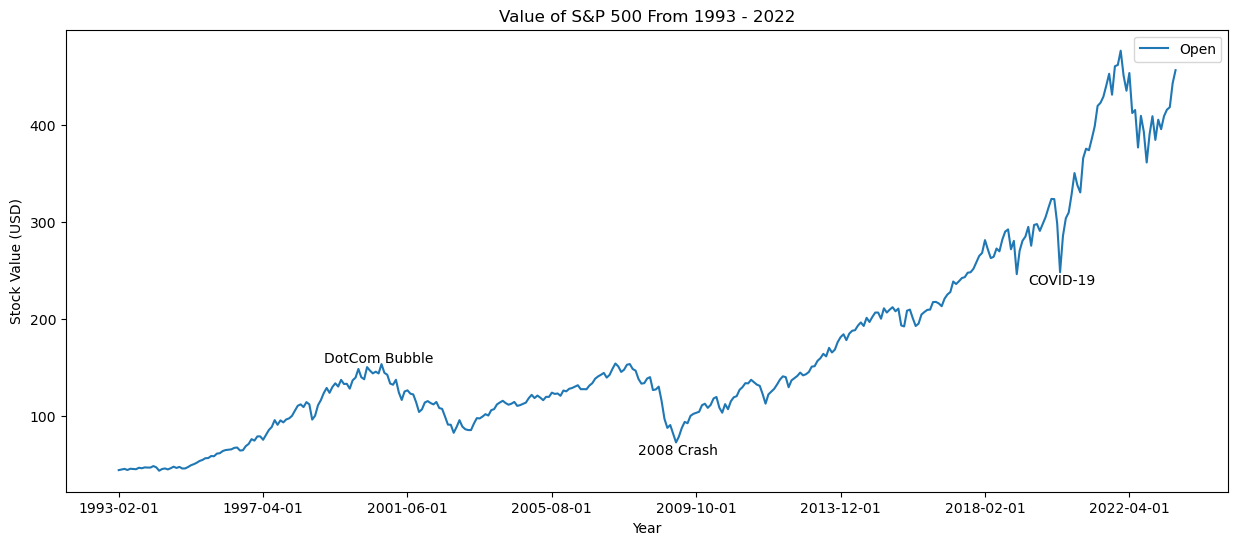

In [24]:
import warnings
warnings.filterwarnings("ignore")
import itertools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import matplotlib
import pmdarima as p
import cpi
cpi.update

# import SPY stock data taken from Yahoo Finance
csv_file_path_monthly = '/Users/theishamarie/Downloads/SPYMonthly.csv'

#dislay first 5 rows of data
print(SPY_monthly.head(5))

#create dataframe using the Date and Open price columns
ts_SPY_monthly = SPY_monthly[['Date','Open']]

#create dataframe using the Date and Open price columns
ts_SPY_monthly = SPY_monthly[['Date','Open']]

#change Date column to datetime
pd.to_datetime(ts_SPY_monthly['Date'])

#set index of dataframe to the date
ts_SPY_monthly = ts_SPY_monthly.set_index('Date')
print(ts_SPY_monthly.head(5))

# Generate forecasts using SARIMAX
sarima_model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_fit = sarima_model.fit(disp=0)
sarima_forecast = sarima_fit.forecast(steps=len(validation_data))

# Generate baseline model (e.g., persistence model)
baseline_forecast = validation_data['Close'].shift(1)
baseline_forecast.iloc[0] = validation_data['Close'].iloc[0]  # First value is NaN after shifting

# Calculate Mean Squared Error for SARIMA and baseline forecasts
mse_sarima = mean_squared_error(validation_data['Close'], sarima_forecast)
mse_baseline = mean_squared_error(validation_data['Close'], baseline_forecast)

# Convert the 'Date' column to datetime format
validation_data['Date'] = pd.to_datetime(validation_data['Date'])

# Create a visualization comparing actual data, SARIMA forecasts, and baseline
plt.figure(figsize=(12, 6))
plt.plot(validation_data['Date'], validation_data['Close'], label='Actual', color='blue')
plt.plot(validation_data['Date'], sarima_forecast, label='SARIMA Forecast', linestyle='dashed', color='green')
plt.plot(validation_data['Date'], baseline_forecast, label='Baseline (Persistence) Model', linestyle='dashed', color='red')

plt.xlabel('Year')
plt.ylabel('Close Price)')
plt.title('S&P 500 Monthly Close Price Forecast Post-Pandemic (2021)')
plt.legend()

#plot Date vs Open price
ts_SPY_monthly.plot(figsize = (15, 6))
#label x axis
plt.xlabel('Year',)
#label y axis
plt.ylabel('Stock Value (USD)')
#title graph
plt.title("Value of S&P 500 From 1993 - 2022")
plt.text(71,155,'DotCom Bubble')
plt.text(180,60,'2008 Crash')
plt.text(315,235,'COVID-19')
plt.show()


This illustration features historical data sourced from Yahoo Finance, portraying monthly records of the S&P 500 index. Covering a timeline from 1993, the dataset encompasses fundamental metrics like date, opening, high, and low prices – customary attributes in stock data. While situated within the realm of financial technology (fintech), this slide spotlights the S&P 500's recent-year trends. The visual representation encapsulates pivotal junctures, including the post-pandemic period, the reverberations of the mortgage crash in 2008, and the deflation of the dot-com bubble. These moments in time are imprinted on the market's behavior, illustrating how significant societal events intersect with fluctuations in the stock market.